∂f/∂x: exp(x)*sin(y)
∂f/∂y: 3*y**2 + exp(x)*cos(y)
Gradient at (1,-1): (-1, -1)
Gradient magnitude at (1,-1): sqrt(2)
∂²h/∂x²: 2*(-2*x**2/(x**2 + y**2) + 1)/(x**2 + y**2)
∂²h/∂y²: 2*(-2*y**2/(x**2 + y**2) + 1)/(x**2 + y**2)
∂²h/∂x∂y: -4*x*y/(x**2 + y**2)**2
∂²h/∂y∂x: -4*x*y/(x**2 + y**2)**2
Mixed derivatives are equal: True


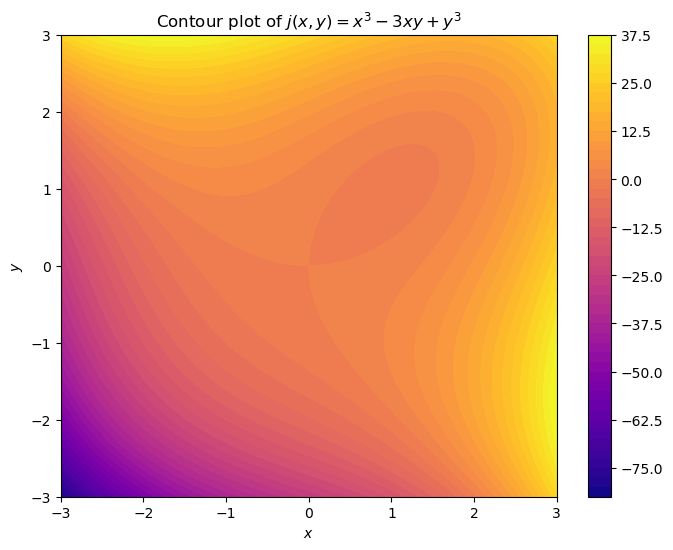

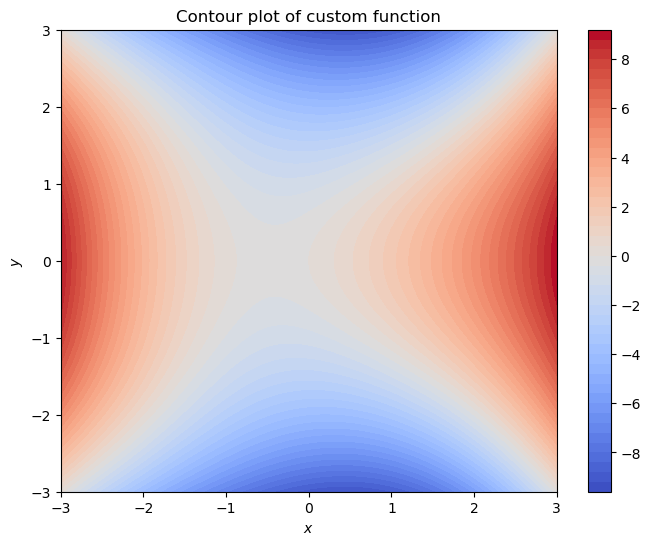

In [2]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# Define symbolic variables
x, y = sp.symbols('x y')

# (a) Define function and compute partial derivatives
f_expr = sp.exp(x) * sp.sin(y) + y**3
f_x = sp.diff(f_expr, x)
f_y = sp.diff(f_expr, y)
print("∂f/∂x:", f_x)
print("∂f/∂y:", f_y)

# (b) Compute the gradient and its magnitude at (1, -1)
g_expr = x**2 * y + x * y**2
g_x = sp.diff(g_expr, x)
g_y = sp.diff(g_expr, y)

# Evaluate at (1, -1)
point_vals = {x: 1, y: -1}
grad_at_point = (g_x.subs(point_vals), g_y.subs(point_vals))
grad_magnitude = sp.sqrt(grad_at_point[0]**2 + grad_at_point[1]**2)
print("Gradient at (1,-1):", grad_at_point)
print("Gradient magnitude at (1,-1):", grad_magnitude)

# (c) Compute second-order partial derivatives for h(x, y)
h_expr = sp.log(x**2 + y**2)
h_xx = sp.diff(h_expr, x, x)
h_yy = sp.diff(h_expr, y, y)
h_xy = sp.diff(h_expr, x, y)
h_yx = sp.diff(h_expr, y, x)
print("∂²h/∂x²:", h_xx)
print("∂²h/∂y²:", h_yy)
print("∂²h/∂x∂y:", h_xy)
print("∂²h/∂y∂x:", h_yx)

# Confirm symmetry of mixed derivatives
print("Mixed derivatives are equal:", h_xy == h_yx)

# (d) Contour plot of j(x, y)
j_expr = x**3 - 3*x*y + y**3
j_func = sp.lambdify((x, y), j_expr, 'numpy')

# Generate grid for plotting
x_vals = np.linspace(-3, 3, 400)
y_vals = np.linspace(-3, 3, 400)
X, Y = np.meshgrid(x_vals, y_vals)
Z = j_func(X, Y)

# Plot contour
plt.figure(figsize=(8,6))
plt.contourf(X, Y, Z, levels=50, cmap='plasma')
plt.colorbar()
plt.title("Contour plot of $j(x, y) = x^3 - 3xy + y^3$")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.show()

# (e) Custom function contour plot
custom_expr = sp.sin(x) * sp.cos(y) + x**2 - y**2
custom_func = sp.lambdify((x, y), custom_expr, 'numpy')

Z_custom = custom_func(X, Y)

plt.figure(figsize=(8,6))
plt.contourf(X, Y, Z_custom, levels=50, cmap='coolwarm')
plt.colorbar()
plt.title("Contour plot of custom function")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.show()
